In [ ]:
import pandas as pd
import torch

In [ ]:
data = pd.read_csv('Position_Salaries.csv')

In [ ]:
data= data.apply(pd.to_numeric, errors= 'coerce')

In [ ]:
data

,Position,Level,Salary
0,NaN,1,45000
1,NaN,2,50000
2,NaN,3,60000
3,NaN,4,80000
4,NaN,5,110000
5,NaN,6,150000
6,NaN,7,200000
7,NaN,8,220000
8,NaN,9,250000


In [ ]:
x = torch.Tensor(data.values[:,1]).unsqueeze(dim=1)
y = torch.Tensor(data.values[:,2]).unsqueeze(dim=1)

In [ ]:
x,y

(tensor([[1.],
         [2.],
         [3.],
         [4.],
         [5.],
         [6.],
         [7.],
         [8.],
         [9.]]),
 tensor([[ 45000.],
         [ 50000.],
         [ 60000.],
         [ 80000.],
         [110000.],
         [150000.],
         [200000.],
         [220000.],
         [250000.]]))

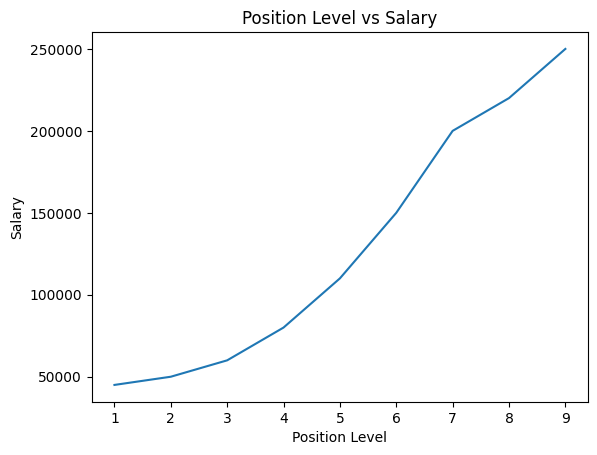

In [ ]:
import matplotlib.pyplot as plt


# Plot Position Level vs. Salary
plt.plot(x, y)
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Position Level vs Salary')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Print the lengths of the splits
len(x_train), len(x_test), len(y_train), len(y_test)


(7, 2, 7, 2)

In [ ]:
from torch import nn

# Define a simple neural network model
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=1),  # First linear layer
    nn.ReLU(),  # ReLU activation
    nn.Linear(in_features=1, out_features=1),  # Second linear layer
)

# Print the model to inspect it
model


Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# Define the loss function and optimizer
loss_fn = nn.L1Loss()  # Mean Absolute Error
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)  # SGD optimizer

# Define the number of epochs
epochs = 1000


In [ ]:
# Training loop
for epoch in range(epochs):
    model.train()  # Set the model to training mode

    # Forward pass: compute predicted y by passing x to the model
    y_pred = model(x_train)

    # Compute loss
    loss = loss_fn(y_pred, y_train)

    # Zero the gradients, perform backpropagation, and update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Test the model's performance on the test set every 10 epochs
    model.eval()
    with torch.inference_mode():
        y_pred = model(x_test)
        test_loss = loss_fn(y_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss.item()} | Test loss: {test_loss.item()}")


Epoch: 0 | Loss: 148570.734375 | Test loss: 62499.2890625
Epoch: 10 | Loss: 148570.625 | Test loss: 62499.1875
Epoch: 20 | Loss: 148570.53125 | Test loss: 62499.0859375
Epoch: 30 | Loss: 148570.421875 | Test loss: 62498.984375
Epoch: 40 | Loss: 148570.3125 | Test loss: 62498.8828125
Epoch: 50 | Loss: 148570.234375 | Test loss: 62498.7890625
Epoch: 60 | Loss: 148570.125 | Test loss: 62498.6875
Epoch: 70 | Loss: 148570.03125 | Test loss: 62498.5859375
Epoch: 80 | Loss: 148569.921875 | Test loss: 62498.484375
Epoch: 90 | Loss: 148569.8125 | Test loss: 62498.3828125
Epoch: 100 | Loss: 148569.734375 | Test loss: 62498.2890625
Epoch: 110 | Loss: 148569.625 | Test loss: 62498.1875
Epoch: 120 | Loss: 148569.53125 | Test loss: 62498.0859375
Epoch: 130 | Loss: 148569.421875 | Test loss: 62497.984375
Epoch: 140 | Loss: 148569.3125 | Test loss: 62497.8828125
Epoch: 150 | Loss: 148569.234375 | Test loss: 62497.7890625
Epoch: 160 | Loss: 148569.125 | Test loss: 62497.6875
Epoch: 170 | Loss: 148569.0

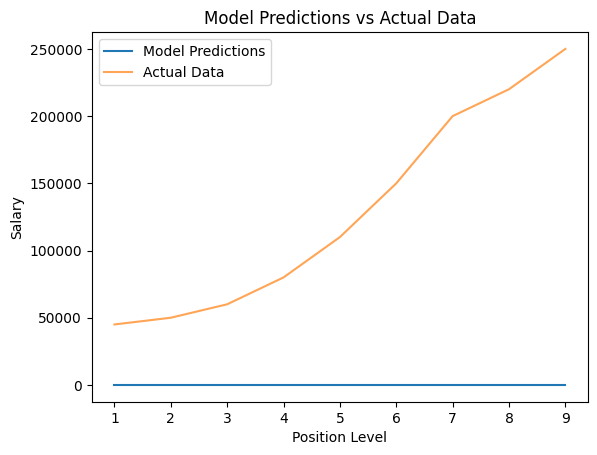

In [ ]:
# Plot the model's predictions along with the original data
model.eval()
with torch.inference_mode():
    plt.plot(x, model(x), label='Model Predictions')
    plt.plot(x, y, label='Actual Data', alpha=0.7)
    plt.xlabel('Position Level')
    plt.ylabel('Salary')
    plt.title('Model Predictions vs Actual Data')
    plt.legend()
    plt.show()
